In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [29]:
aData = pd.read_csv("Churn_Modelling.csv")

In [30]:
aData.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
aData.drop(["RowNumber", "CustomerId","Surname"], axis=1, inplace=True);

In [32]:
le = LabelEncoder()

aData["Geography"] = aData[["Geography"]].apply(le.fit_transform);

In [33]:
aData

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
aData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [35]:
aData.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
aData["Gender"] = aData[["Gender"]].apply(le.fit_transform);

In [37]:
aData["Balance"]=aData["Balance"].apply(lambda x: aData["Balance"].mean() if x==0 else x);
aData

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,76485.889288,1,1,1,101348.88,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,0,39,1,76485.889288,2,0,0,93826.63,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,76485.889288,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.610000,1,1,1,101699.77,0
9997,709,0,0,36,7,76485.889288,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.310000,2,1,0,92888.52,1


In [38]:
x = aData.drop("Exited", axis=1)
y = aData["Exited"]

X_Train, X_Test, Y_Train,  Y_Test = train_test_split(x,y,test_size=0.25)
print(X_Train.shape,X_Test.shape, Y_Train.shape, Y_Test.shape )




(7500, 10) (2500, 10) (7500,) (2500,)


In [12]:
SS = StandardScaler()

In [39]:
lx = LinearRegression()
lx.fit(X_Train,Y_Train);
prad = lx.fit(X_Train,Y_Train).predict(X_Test)
#X_Train = SS.fit_transform(X_Train);
#X_Test = SS.fit_transform(X_Test);

In [14]:
X_Train.shape

(7500, 10)

In [15]:
lx1 = LinearRegression()
lx1.fit(X_Train, Y_Train)
prad1 = lx1.predict(X_Test);

In [16]:
prad.shape

(2500,)

<Axes: >

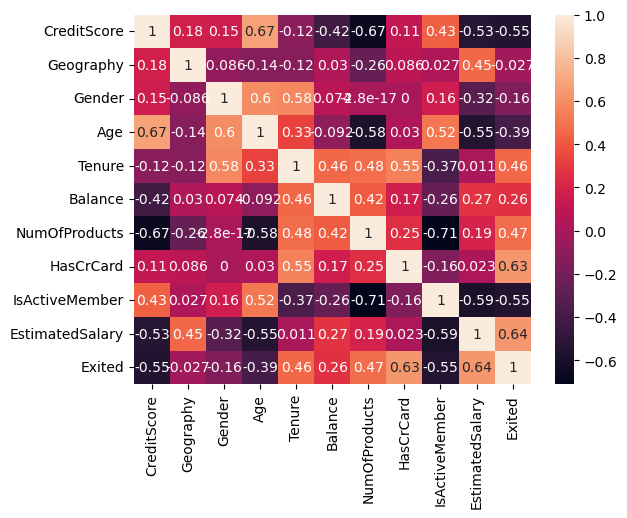

In [17]:
sns.heatmap(aData.iloc[0:9].corr(), annot=True)

In [40]:
r2_score(Y_Test,prad)

0.1310453710558388

In [20]:
mean_squared_error(Y_Test, prad, squared=False)

/home/akon/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.37671279212201203)

In [21]:
r2_score(Y_Test, prad1)

0.1252552553053763

In [41]:
mean_squared_error(Y_Test, prad, squared = False)

/home/akon/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.3810040478694365)

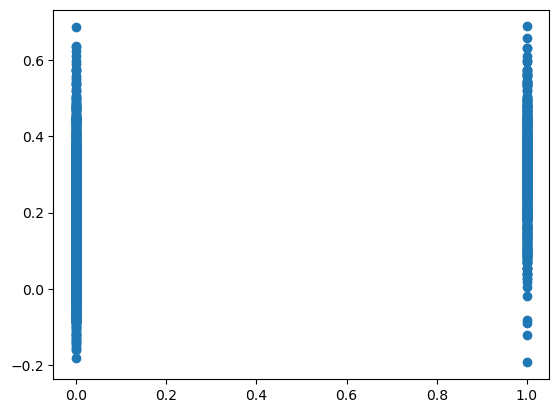

In [42]:
plt.scatter(Y_Test, prad)
plt.show()

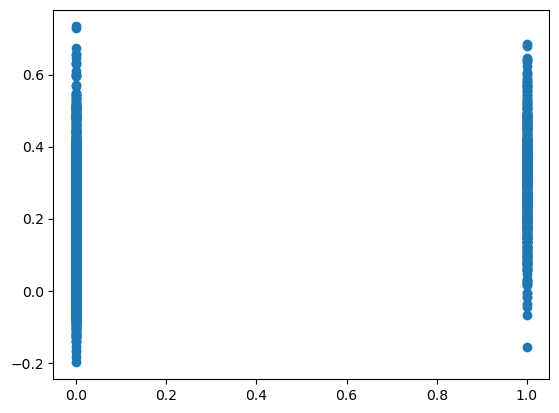

In [27]:
plt.scatter(Y_Test, prad)